# Weather Forecast Using  pyown
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
pyown is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



## 1 Accessing pyown API
On the first steps of our analysis we are going to get weather information for the define city using pyown API. <br>
The information is going to be organized on a dictionary, and later loaded as a pandas DataFrame for performing the Data wrangling.

In [2]:
# import libraries
from pyowm import OWM
import pyowm
import pandas as pd
import seaborn as sns

In [3]:
# Set API key
owm = OWM('3fb62110b42fec1124c89b9931aed05b')

In [4]:
# Define the default parameters
city = 'Sao Paulo,BR'

In [5]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [6]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [7]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [8]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df.head()

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
0,2019-12-04 18:00:00+00:00,88,48,27.61,29.11,27.61,moderate rain,http://openweathermap.org/img/w/10d.png,3.12
1,2019-12-04 21:00:00+00:00,87,60,25.37,26.49,25.37,light rain,http://openweathermap.org/img/w/10d.png,1.31
2,2019-12-05 00:00:00+00:00,93,71,23.63,24.38,23.63,light rain,http://openweathermap.org/img/w/10n.png,0.25
3,2019-12-05 03:00:00+00:00,50,75,22.82,23.19,22.82,scattered clouds,http://openweathermap.org/img/w/03n.png,0.00
4,2019-12-05 06:00:00+00:00,76,73,22.74,22.74,22.74,broken clouds,http://openweathermap.org/img/w/04n.png,0.00


In [11]:
# Create a dataframe agregating the values based on each day
# for mean
df_mean = df.resample('D', on='datetime').mean()
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
datetime,,,,,,
2019-12-04 00:00:00+00:00,87.500000,54.000,26.490000,27.800000,26.490000,2.21500
2019-12-05 00:00:00+00:00,89.875000,67.625,24.845000,24.985000,24.845000,1.27375
2019-12-06 00:00:00+00:00,100.000000,80.375,21.188750,21.188750,21.188750,1.24250
2019-12-07 00:00:00+00:00,67.625000,62.375,21.051250,21.051250,21.051250,0.00000
2019-12-08 00:00:00+00:00,48.750000,57.875,20.252500,20.252500,20.252500,0.00000
2019-12-09 00:00:00+00:00,38.666667,60.000,18.883333,18.883333,18.883333,0.00000


In [12]:
# for max
df_max = df.resample('D', on='datetime').max()
df_max

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,,
2019-12-04 00:00:00+00:00,2019-12-04 21:00:00+00:00,88,60,27.61,29.11,27.61,moderate rain,http://openweathermap.org/img/w/10d.png,3.12
2019-12-05 00:00:00+00:00,2019-12-05 21:00:00+00:00,100,75,29.13,29.13,29.13,scattered clouds,http://openweathermap.org/img/w/10n.png,6.00
2019-12-06 00:00:00+00:00,2019-12-06 21:00:00+00:00,100,87,23.21,23.21,23.21,overcast clouds,http://openweathermap.org/img/w/10n.png,3.25
2019-12-07 00:00:00+00:00,2019-12-07 21:00:00+00:00,100,79,26.73,26.73,26.73,scattered clouds,http://openweathermap.org/img/w/04n.png,0.00
2019-12-08 00:00:00+00:00,2019-12-08 21:00:00+00:00,98,78,25.96,25.96,25.96,scattered clouds,http://openweathermap.org/img/w/04n.png,0.00
2019-12-09 00:00:00+00:00,2019-12-09 15:00:00+00:00,59,73,26.10,26.10,26.10,scattered clouds,http://openweathermap.org/img/w/04d.png,0.00


In [13]:
# for min
df_min = df.resample('D', on='datetime').min()
df_min

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,,
2019-12-04 00:00:00+00:00,2019-12-04 18:00:00+00:00,87,48,25.37,26.49,25.37,light rain,http://openweathermap.org/img/w/10d.png,1.31
2019-12-05 00:00:00+00:00,2019-12-05 00:00:00+00:00,50,52,22.74,22.74,22.74,broken clouds,http://openweathermap.org/img/w/03n.png,0.00
2019-12-06 00:00:00+00:00,2019-12-06 00:00:00+00:00,100,72,19.68,19.68,19.68,light rain,http://openweathermap.org/img/w/04d.png,0.00
2019-12-07 00:00:00+00:00,2019-12-07 00:00:00+00:00,1,38,17.16,17.16,17.16,clear sky,http://openweathermap.org/img/w/01d.png,0.00
2019-12-08 00:00:00+00:00,2019-12-08 00:00:00+00:00,0,30,16.08,16.08,16.08,broken clouds,http://openweathermap.org/img/w/01d.png,0.00
2019-12-09 00:00:00+00:00,2019-12-09 00:00:00+00:00,1,34,15.58,15.58,15.58,broken clouds,http://openweathermap.org/img/w/01n.png,0.00


In [14]:
# Create a Dataframe with temperature values (min, max, average) by merging on index
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Rename columns
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

,temp_min,temp_max,temp_mean
datetime,,,
2019-12-04 00:00:00+00:00,25.37,27.61,26.490000
2019-12-05 00:00:00+00:00,22.74,29.13,24.845000
2019-12-06 00:00:00+00:00,19.68,23.21,21.188750
2019-12-07 00:00:00+00:00,17.16,26.73,21.051250
2019-12-08 00:00:00+00:00,16.08,25.96,20.252500
2019-12-09 00:00:00+00:00,15.58,26.10,18.883333


## 2 Creating the visualizations
On this part, we are going to plot the organized data using seaborn.

/home/gabriel/miniconda3/envs/papermill/lib/python3.7/site-packages/pandas/core/indexing.py:376: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  self.obj[key] = _infer_fill_value(value)
/home/gabriel/miniconda3/envs/papermill/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
/home/gabriel/miniconda3/en

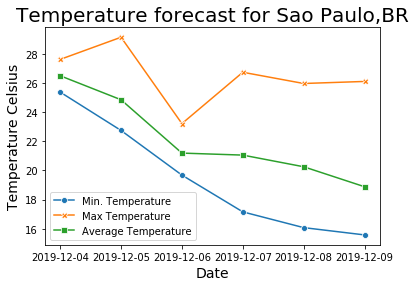

In [15]:
ax = sns.lineplot(data=df_temp, style="event",markers=True, dashes=False)
ax.set_title(f'Temperature forecast for {city}', fontsize=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Temperature Celsius', fontsize=14)
#ax.ylim(0, 35)
#sns.plt.ylim(0, 20)


ax.legend(labels=['Min. Temperature', 'Max Temperature', 'Average Temperature'])

#ax.figure.savefig("word2vec_similarity.png", dpi=400, bbox_inches='tight')
ax.figure.savefig(f'{city}_temperature.png', 
                       dpi=600, facecolor='w', orientation='portrait')


In [16]:
# Create a Dataframe with total expected volume for rain on each day
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day

,rain_vol
datetime,
2019-12-04 00:00:00+00:00,4.43
2019-12-05 00:00:00+00:00,10.19
2019-12-06 00:00:00+00:00,9.94
2019-12-07 00:00:00+00:00,0.00
2019-12-08 00:00:00+00:00,0.00
2019-12-09 00:00:00+00:00,0.00


In [17]:
df.set_index('datetime', drop=True, inplace=True)

In [18]:
df.head()

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,
2019-12-04 18:00:00+00:00,88,48,27.61,29.11,27.61,moderate rain,http://openweathermap.org/img/w/10d.png,3.12
2019-12-04 21:00:00+00:00,87,60,25.37,26.49,25.37,light rain,http://openweathermap.org/img/w/10d.png,1.31
2019-12-05 00:00:00+00:00,93,71,23.63,24.38,23.63,light rain,http://openweathermap.org/img/w/10n.png,0.25
2019-12-05 03:00:00+00:00,50,75,22.82,23.19,22.82,scattered clouds,http://openweathermap.org/img/w/03n.png,0.00
2019-12-05 06:00:00+00:00,76,73,22.74,22.74,22.74,broken clouds,http://openweathermap.org/img/w/04n.png,0.00


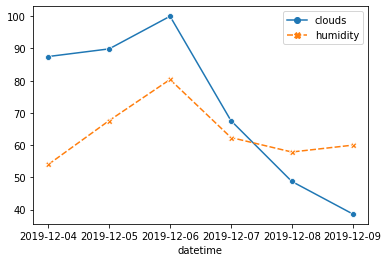

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']], markers=True)
#ax2 = ax1.twinx()
#ax2 = sns.barplot(x=[1,2,3,4,5],  y="rain_vol",data=df_rain_per_day)
#ax2.grid(False)
plt.show()

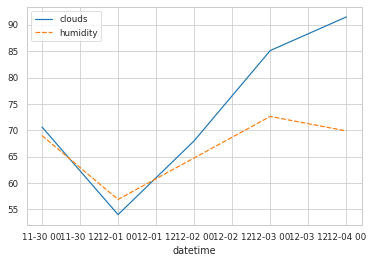

In [90]:
#ax = sns.lineplot(x=df.index, y="temp",
#                markers=True, dashes=False, data=df)
ax = sns.lineplot(data=df_mean[['clouds', 'humidity']])
#ax = sns.barplot(x=[1,2,3,4,5],  y="rain_vol",data=df_rain_per_day)
#ax = sns.barplot(data=df_rain_per_day)